In [ ]:
!pip install text-hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving overruling.csv to overruling.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

In [ ]:
df = pd.read_csv('overruling.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2400 non-null   int64 
 1   text    2400 non-null   object
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,label,text
0,0,876 f.3d at 1306.
1,0,the analysis below is included to satisfy our ...
2,0,my colleagues argue that their imposition of s...
3,0,"further, the easement is silent with regard to..."
4,1,"for the reasons that follow, we approve the fi..."
...,...,...
2395,1,"in the event the trial court cannot, for reaso..."
2396,1,to the extent that our holdings in patman v. s...
2397,1,we disapprove orange county v. sealy to the ex...
2398,1,to the extent that our previous opinion in sta...


In [ ]:
df['word_length'] = df['text'].apply(lambda x:len(x.split()))

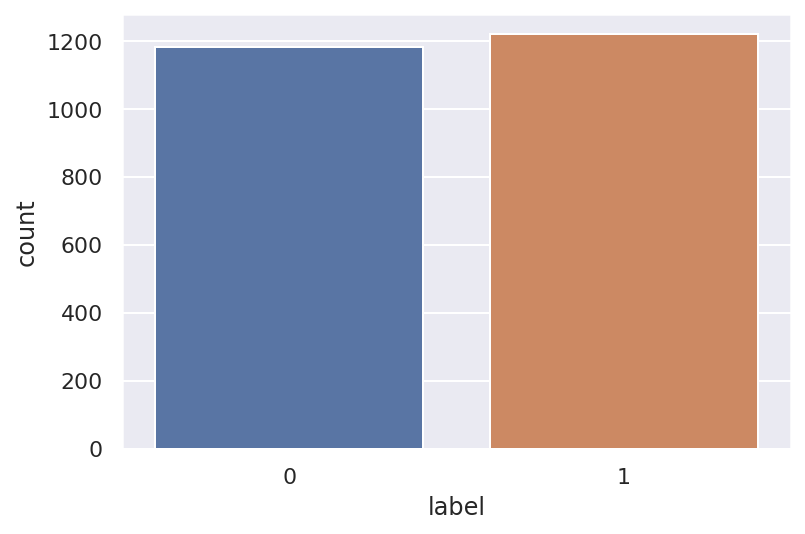

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.label)
plt.show()

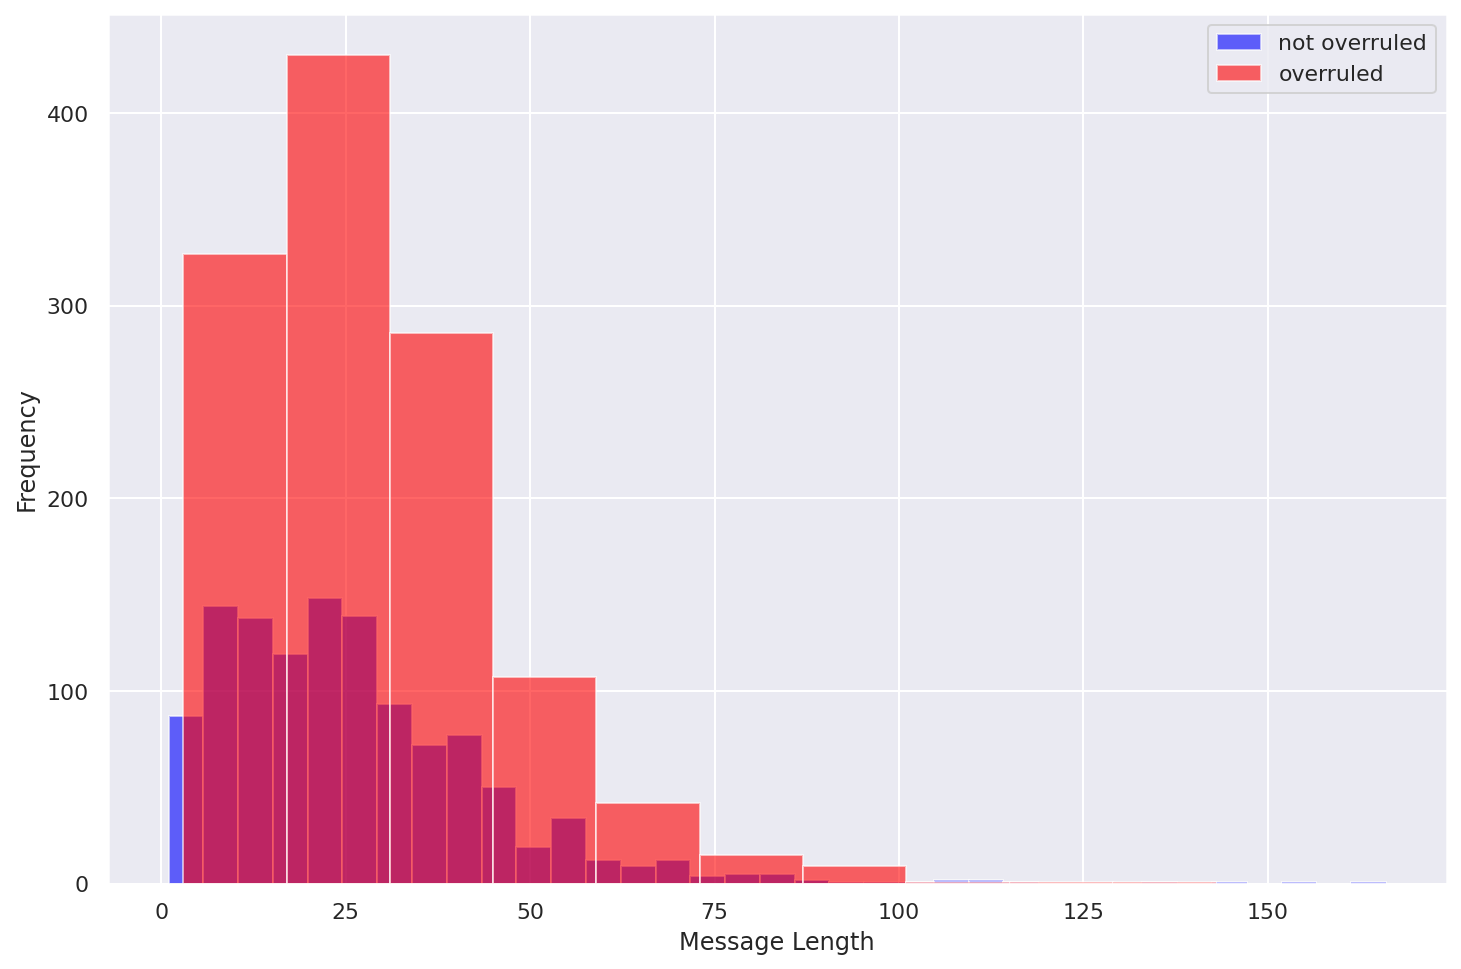

In [ ]:
plt.figure(figsize=(12, 8))

df[df.label==0].word_length.plot(bins=35, kind='hist', color='blue',
                                       label='not overruled', alpha=0.6)
df[df.label == 1].word_length.plot(kind='hist', color='red',
                                       label='overruled', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.show()

In [ ]:
import text_hammer as th

In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 456 µs, sys: 0 ns, total: 456 µs
Wall time: 384 µs


In [ ]:
%%time
cleaned_df = text_preprocessing(df, "text")

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

CPU times: user 25.9 s, sys: 262 ms, total: 26.2 s
Wall time: 32.9 s


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk



### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.text:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(50)

[('v', 832),
 ('court', 669),
 ('overrule', 632),
 ('extent', 512),
 ('case', 463),
 ('hold', 355),
 ('state', 328),
 ('decision', 309),
 ('disapprove', 302),
 ('opinion', 237),
 ('supra', 216),
 ('appeal', 205),
 ('rule', 185),
 ('trial', 177),
 ('inconsistent', 168),
 ('defendant', 167),
 ('district', 151),
 ('conflict', 145),
 ('contrary', 135),
 ('evidence', 133),
 ('claim', 124),
 ('so2d', 115),
 ('law', 114),
 ('follow', 103),
 ('find', 100),
 ('issue', 97),
 ('judgment', 92),
 ('order', 92),
 ('accordingly', 89),
 ('people', 89),
 ('statement', 88),
 ('require', 86),
 ('application', 86),
 ('_', 81),
 ('review', 80),
 ('sw2d', 79),
 ('apply', 79),
 ('motion', 79),
 ('fact', 78),
 ('d', 78),
 ('cir', 78),
 ('co', 77),
 ('prior', 74),
 ('section', 74),
 ('expressly', 72),
 ('support', 71),
 ('however', 71),
 ('language', 71),
 ('i', 70),
 ('act', 70)]

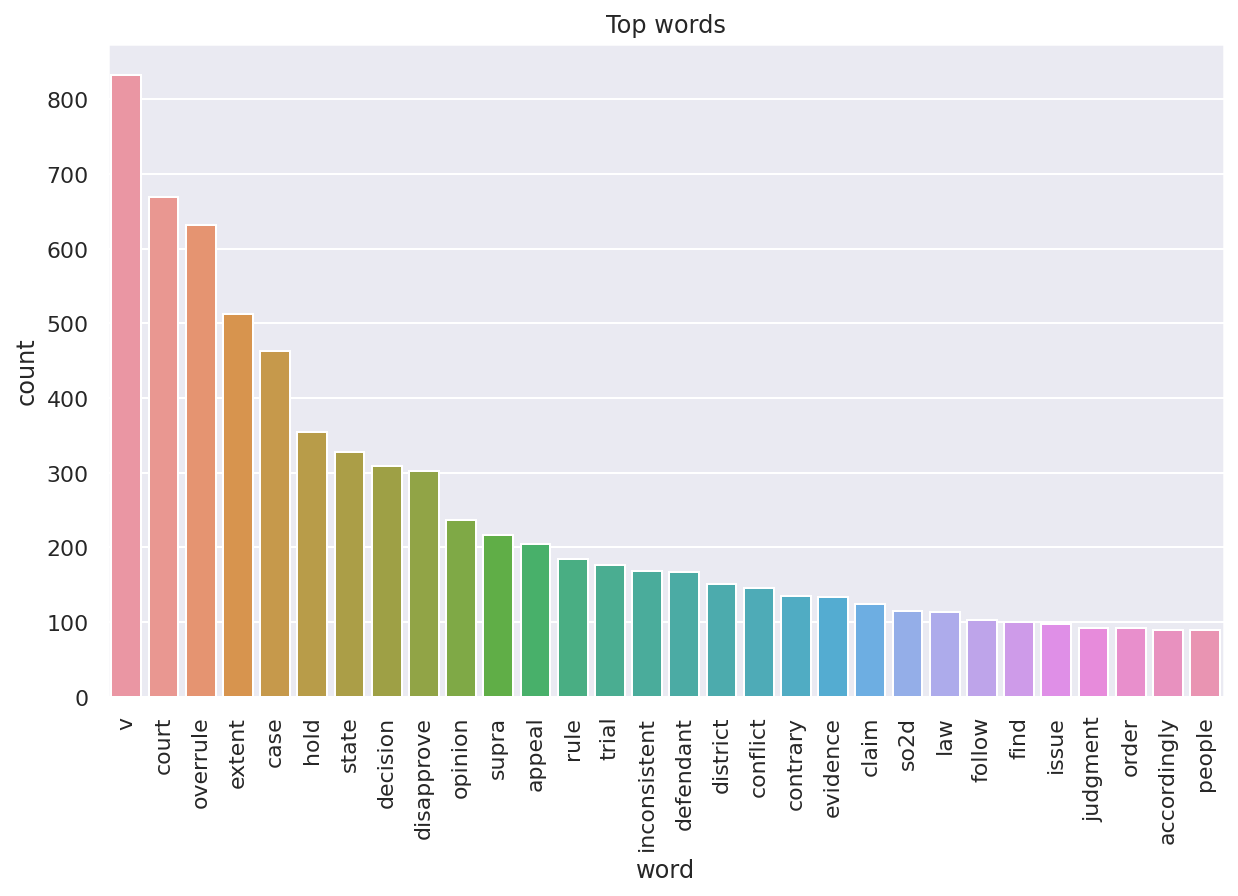

In [ ]:
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count',
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(cleaned_df.text, cleaned_df.label, test_size = 0.2, stratify = cleaned_df.label, shuffle=True)

In [ ]:
len(X_train)

1920

In [ ]:
from keras.preprocessing.text import Tokenizer
num_words = 8294
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
len(tokenizer.word_index)

8294

In [ ]:
cleaned_df.word_length.max()

166

In [ ]:
from keras_preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=166,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 166, padding = 'post')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional,ConvLSTM1D,MaxPooling1D,Conv1D
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_vecor_length = 500
model = Sequential()
model.add(Embedding(num_words, embedding_vecor_length, input_length=X_train_pad.shape[1]))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=1))

model.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(CuDNNLSTM(64,return_sequences=False)))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

print(model.summary())
filepath="weights_best_cnn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]
history_embedding = model.fit(X_train_pad, y_train, epochs=15, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(X_test_pad,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 166, 500)          4147000   
                                                                 
 conv1d (Conv1D)             (None, 166, 32)           48032     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 166, 32)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 166, 256)         165888    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 166, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              1

8/8 [==============================] - 14s 300ms/step - loss: 0.6931 - accuracy: 0.5167 - val_loss: 0.6923 - val_accuracy: 0.5083
Epoch 2/15
7/8 [=========================>....] - ETA: 0s - loss: 0.6922 - accuracy: 0.5106

8/8 [==============================] - 1s 78ms/step - loss: 0.6919 - accuracy: 0.5172 - val_loss: 0.6913 - val_accuracy: 0.5083
Epoch 3/15
7/8 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5112

8/8 [==============================] - 1s 79ms/step - loss: 0.6908 - accuracy: 0.5078 - val_loss: 0.6898 - val_accuracy: 0.5083
Epoch 4/15
7/8 [=========================>....] - ETA: 0s - loss: 0.6883 - accuracy: 0.5056

8/8 [==============================] - 1s 77ms/step - loss: 0.6882 - accuracy: 0.5078 - val_loss: 0.6868 - val_accuracy: 0.5083
Epoch 5/15
7/8 [=========================>....] - ETA: 0s - loss: 0.6838 - accuracy: 0.5301

8/8 [==============================] - 1s 76ms/step - loss: 0.6837 - accuracy: 0.5307 - val_loss: 0.6813 - val_accuracy: 0.5729
Epoch 6/15
8/8 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.6609

8/8 [==============================] - 1s 77ms/step - loss: 0.6748 - accuracy: 0.6609 - val_loss: 0.6703 - val_accuracy: 0.6854
Epoch 7/15
7/8 [=========================>....] - ETA: 0s - loss: 0.6584 - accuracy: 0.8047

8/8 [==============================] - 1s 77ms/step - loss: 0.6573 - accuracy: 0.8073 - val_loss: 0.6483 - val_accuracy: 0.7750
Epoch 8/15
7/8 [=========================>....] - ETA: 0s - loss: 0.6244 - accuracy: 0.8493

8/8 [==============================] - 1s 76ms/step - loss: 0.6217 - accuracy: 0.8516 - val_loss: 0.6032 - val_accuracy: 0.8062
Epoch 9/15
7/8 [=========================>....] - ETA: 0s - loss: 0.5539 - accuracy: 0.8856

8/8 [==============================] - 1s 77ms/step - loss: 0.5506 - accuracy: 0.8854 - val_loss: 0.5252 - val_accuracy: 0.8271
Epoch 10/15
7/8 [=========================>....] - ETA: 0s - loss: 0.4330 - accuracy: 0.9252

8/8 [==============================] - 1s 76ms/step - loss: 0.4273 - accuracy: 0.9281 - val_loss: 0.4040 - val_accuracy: 0.8896
Epoch 11/15
7/8 [=========================>....] - ETA: 0s - loss: 0.2519 - accuracy: 0.9693

8/8 [==============================] - 1s 77ms/step - loss: 0.2463 - accuracy: 0.9688 - val_loss: 0.2520 - val_accuracy: 0.9208
Epoch 12/15
7/8 [=========================>....] - ETA: 0s - loss: 0.1071 - accuracy: 0.9799

8/8 [==============================] - 1s 76ms/step - loss: 0.1059 - accuracy: 0.9802 - val_loss: 0.2078 - val_accuracy: 0.9271
Epoch 13/15
8/8 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 0.9760

8/8 [==============================] - 1s 77ms/step - loss: 0.0977 - accuracy: 0.9760 - val_loss: 0.3846 - val_accuracy: 0.8271
Epoch 14/15
8/8 [==============================] - ETA: 0s - loss: 0.0833 - accuracy: 0.9797

8/8 [==============================] - 1s 77ms/step - loss: 0.0833 - accuracy: 0.9797 - val_loss: 0.2110 - val_accuracy: 0.9396
Epoch 15/15
7/8 [=========================>....] - ETA: 0s - loss: 0.0700 - accuracy: 0.9927

8/8 [==============================] - 1s 78ms/step - loss: 0.0694 - accuracy: 0.9927 - val_loss: 0.2516 - val_accuracy: 0.9062


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:

tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

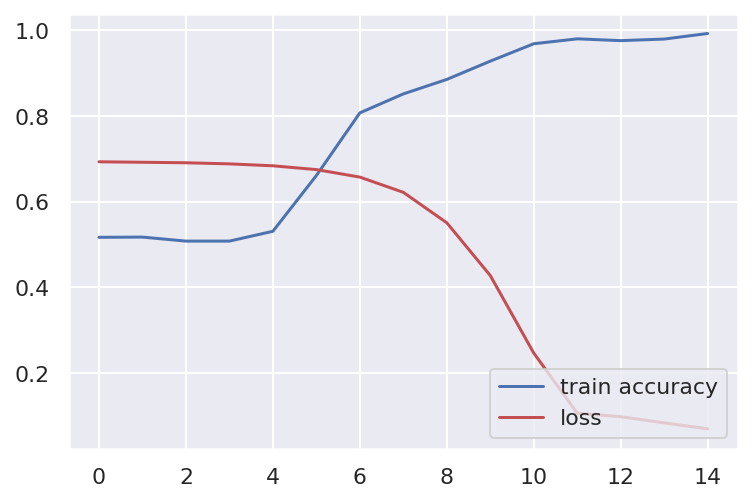

In [ ]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['loss'],c='r',label='loss')
plt.legend(loc='lower right')
plt.show()

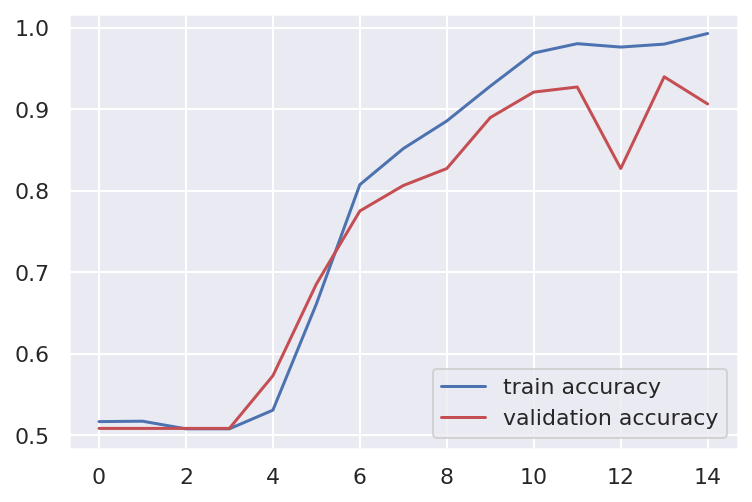

In [ ]:

plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

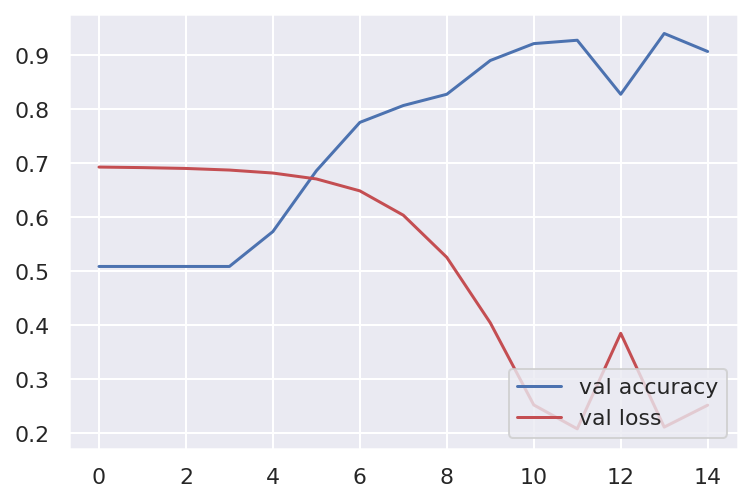

In [ ]:
plt.plot(history_embedding.history['val_accuracy'],c='b',label='val accuracy')
plt.plot(history_embedding.history['val_loss'],c='r',label='val loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.evaluate(X_test_pad, y_test)

15/15 [==============================] - 0s 15ms/step - loss: 0.2516 - accuracy: 0.9062


[0.2515862286090851, 0.90625]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 166, 500)          4147000   
                                                                 
 conv1d (Conv1D)             (None, 166, 32)           48032     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 166, 32)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 166, 256)         165888    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 166, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              1

In [ ]:
y_pred = np.where(model.predict(X_test_pad)>.5,1,0)

15/15 [==============================] - 1s 11ms/step


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       205
           1       0.97      0.86      0.91       275

    accuracy                           0.91       480
   macro avg       0.91      0.91      0.91       480
weighted avg       0.91      0.91      0.91       480



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

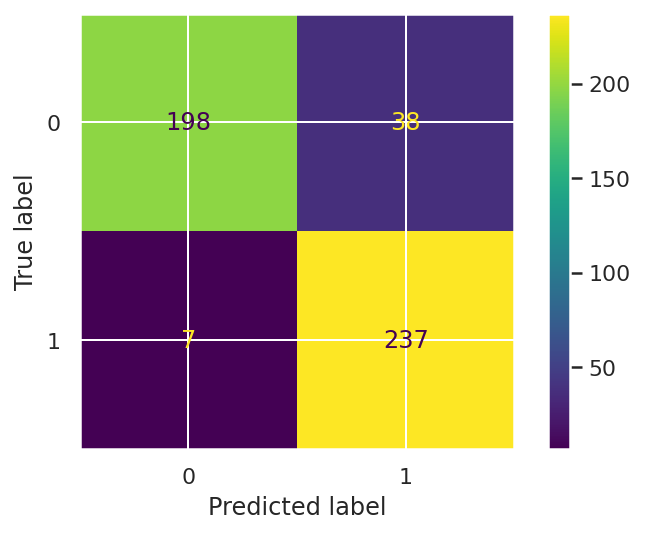

In [ ]:
mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(mat)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving final_augdata.csv to final_augdata.csv


In [ ]:
df1 = pd.read_csv('final_augdata.csv')

In [ ]:
df1.reset_index(drop=True, inplace=True)

In [ ]:
import text_hammer as th

In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
#     df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 621 µs, sys: 0 ns, total: 621 µs
Wall time: 602 µs


In [ ]:
%%time
cleaned_df1 = text_preprocessing(df1, "text")

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

  0%|          | 0/47671 [00:00<?, ?it/s]

CPU times: user 6min 26s, sys: 4.45 s, total: 6min 31s
Wall time: 6min 31s


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk



### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df1.text:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(50)

[('court', 22490),
 ('overrule', 12056),
 ('v', 10682),
 ('case', 7699),
 ('state', 7006),
 ('decision', 6967),
 ('defendant', 6832),
 ('hold', 6425),
 ('trial', 4566),
 ('extent', 4432),
 ('rule', 4267),
 ('appeal', 4041),
 ('law', 4038),
 ('find', 3553),
 ('evidence', 3433),
 ('opinion', 3027),
 ('right', 2917),
 ('district', 2812),
 ('s', 2797),
 ('motion', 2608),
 ('order', 2534),
 ('objection', 2513),
 ('2d', 2317),
 ('claim', 2282),
 ('disapprove', 2181),
 ('application', 2104),
 ('issue', 2090),
 ('judgment', 2060),
 ('person', 1973),
 ('plaintiff', 1925),
 ('fact', 1912),
 ('united', 1907),
 ('supra', 1906),
 ('states', 1875),
 ('require', 1850),
 ('action', 1780),
 ('act', 1764),
 ('statute', 1762),
 ('d', 1734),
 ('inconsistent', 1664),
 ('question', 1641),
 ('supreme', 1635),
 ('err', 1605),
 ('consider', 1554),
 ('new', 1522),
 ('follow', 1498),
 ('jury', 1494),
 ('apply', 1491),
 ('1', 1471),
 ('party', 1461)]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(cleaned_df1.text, cleaned_df1.label, test_size = 0.2, stratify = cleaned_df1.label, shuffle=True)

In [ ]:
from keras.preprocessing.text import Tokenizer
num_words = 24600
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
from keras_preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=217,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 217, padding = 'post')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [ ]:
# create the model
embedding_vecor_length = 500
model_withaug = Sequential()
model_withaug.add(Embedding(num_words, embedding_vecor_length, input_length=X_train_pad.shape[1]))

model_withaug.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_withaug.add(MaxPooling1D(pool_size=1))

model_withaug.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
model_withaug.add(Dropout(0.2))

model_withaug.add(Bidirectional(CuDNNLSTM(64,return_sequences=False)))
model_withaug.add(Dropout(0.2))

model_withaug.add(Dense(1, activation='sigmoid'))

model_withaug.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

print(model_withaug.summary())
filepath="model_withaug.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=True)
callbacks_list = [checkpoint]
history_embedding = model_withaug.fit(X_train_pad, y_train, epochs=15, batch_size=256,verbose = 1,callbacks = callbacks_list,validation_data=(X_test_pad,y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 217, 500)          12300000  
                                                                 
 conv1d_1 (Conv1D)           (None, 217, 32)           48032     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 217, 32)          0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 217, 256)         165888    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 217, 256)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)             

149/149 [==============================] - 21s 119ms/step - loss: 0.5894 - accuracy: 0.6954 - val_loss: 0.4059 - val_accuracy: 0.8181
Epoch 2/15
149/149 [==============================] - ETA: 0s - loss: 0.3423 - accuracy: 0.8533

149/149 [==============================] - 16s 110ms/step - loss: 0.3423 - accuracy: 0.8533 - val_loss: 0.3368 - val_accuracy: 0.8545
Epoch 3/15
149/149 [==============================] - ETA: 0s - loss: 0.2711 - accuracy: 0.8854

149/149 [==============================] - 16s 107ms/step - loss: 0.2711 - accuracy: 0.8854 - val_loss: 0.3160 - val_accuracy: 0.8543
Epoch 4/15
149/149 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9075

149/149 [==============================] - 16s 107ms/step - loss: 0.2200 - accuracy: 0.9075 - val_loss: 0.3290 - val_accuracy: 0.8581
Epoch 5/15
149/149 [==============================] - ETA: 0s - loss: 0.1865 - accuracy: 0.9231

149/149 [==============================] - 16s 107ms/step - loss: 0.1865 - accuracy: 0.9231 - val_loss: 0.3484 - val_accuracy: 0.8623
Epoch 6/15
149/149 [==============================] - ETA: 0s - loss: 0.1586 - accuracy: 0.9355

149/149 [==============================] - 16s 108ms/step - loss: 0.1586 - accuracy: 0.9355 - val_loss: 0.3625 - val_accuracy: 0.8595
Epoch 7/15
149/149 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.9453

149/149 [==============================] - 16s 108ms/step - loss: 0.1366 - accuracy: 0.9453 - val_loss: 0.3835 - val_accuracy: 0.8636
Epoch 8/15
149/149 [==============================] - ETA: 0s - loss: 0.1245 - accuracy: 0.9501

149/149 [==============================] - 16s 108ms/step - loss: 0.1245 - accuracy: 0.9501 - val_loss: 0.3805 - val_accuracy: 0.8630
Epoch 9/15
149/149 [==============================] - ETA: 0s - loss: 0.1140 - accuracy: 0.9538

149/149 [==============================] - 16s 107ms/step - loss: 0.1140 - accuracy: 0.9538 - val_loss: 0.4083 - val_accuracy: 0.8623
Epoch 10/15
149/149 [==============================] - ETA: 0s - loss: 0.1048 - accuracy: 0.9576

149/149 [==============================] - 16s 107ms/step - loss: 0.1048 - accuracy: 0.9576 - val_loss: 0.3911 - val_accuracy: 0.8636
Epoch 11/15
149/149 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9600

149/149 [==============================] - 16s 107ms/step - loss: 0.0984 - accuracy: 0.9600 - val_loss: 0.3939 - val_accuracy: 0.8625
Epoch 12/15
149/149 [==============================] - ETA: 0s - loss: 0.0951 - accuracy: 0.9615

149/149 [==============================] - 16s 107ms/step - loss: 0.0951 - accuracy: 0.9615 - val_loss: 0.4338 - val_accuracy: 0.8607
Epoch 13/15
149/149 [==============================] - ETA: 0s - loss: 0.0870 - accuracy: 0.9641

149/149 [==============================] - 16s 108ms/step - loss: 0.0870 - accuracy: 0.9641 - val_loss: 0.4473 - val_accuracy: 0.8620
Epoch 14/15
149/149 [==============================] - ETA: 0s - loss: 0.0826 - accuracy: 0.9662

149/149 [==============================] - 16s 107ms/step - loss: 0.0826 - accuracy: 0.9662 - val_loss: 0.4459 - val_accuracy: 0.8632
Epoch 15/15
149/149 [==============================] - ETA: 0s - loss: 0.0823 - accuracy: 0.9656

149/149 [==============================] - 16s 107ms/step - loss: 0.0823 - accuracy: 0.9656 - val_loss: 0.4742 - val_accuracy: 0.8592


In [ ]:
from sklearn.metrics import roc_curve
y_pred_withaug = model_withaug.predict(X_test_pad).ravel()
fpr_withaug, tpr_withaug, thresholds_withaug = roc_curve(y_test, y_pred_withaug)

298/298 [==============================] - 5s 16ms/step


In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test_pad).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

15/15 [==============================] - 0s 20ms/step


In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
from sklearn.metrics import auc
auc_withaug = auc(fpr_withaug, tpr_withaug)

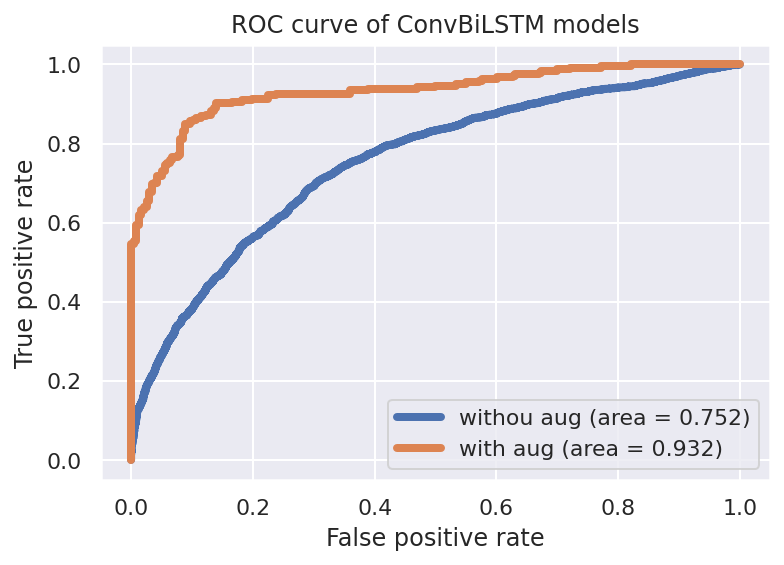

In [ ]:
plt.plot(fpr_withaug, tpr_withaug,linewidth=4, label='withou aug (area = {:.3f})'.format(auc_withaug))

plt.plot(fpr_keras, tpr_keras,linewidth=4, label='with aug (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of ConvBiLSTM models')
plt.legend(loc='best')
plt.savefig("ROC_CONV.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
model.save('roc_conv_noaug.h5')
model_withaug.save('roc_conv_withaug.h5')